# IMPORT NECESSARY MODULES AND PACKAGES

In [29]:


import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [30]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# ANALYZING

In [32]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


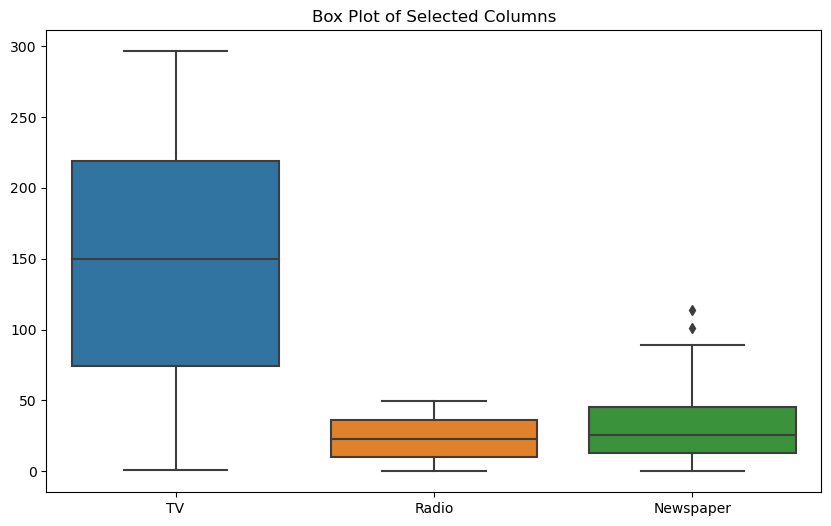

In [33]:
selected_columns = ["TV","Radio","Newspaper"]  
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[selected_columns])
plt.title('Box Plot of Selected Columns')
plt.show()

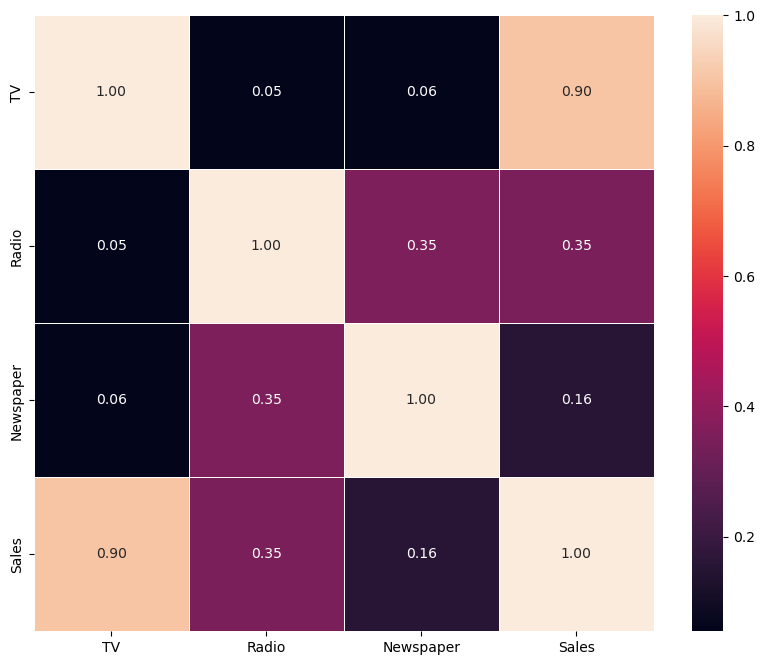

In [34]:
hcorr=df.corr(method="pearson")
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(hcorr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

<Figure size 640x480 with 0 Axes>

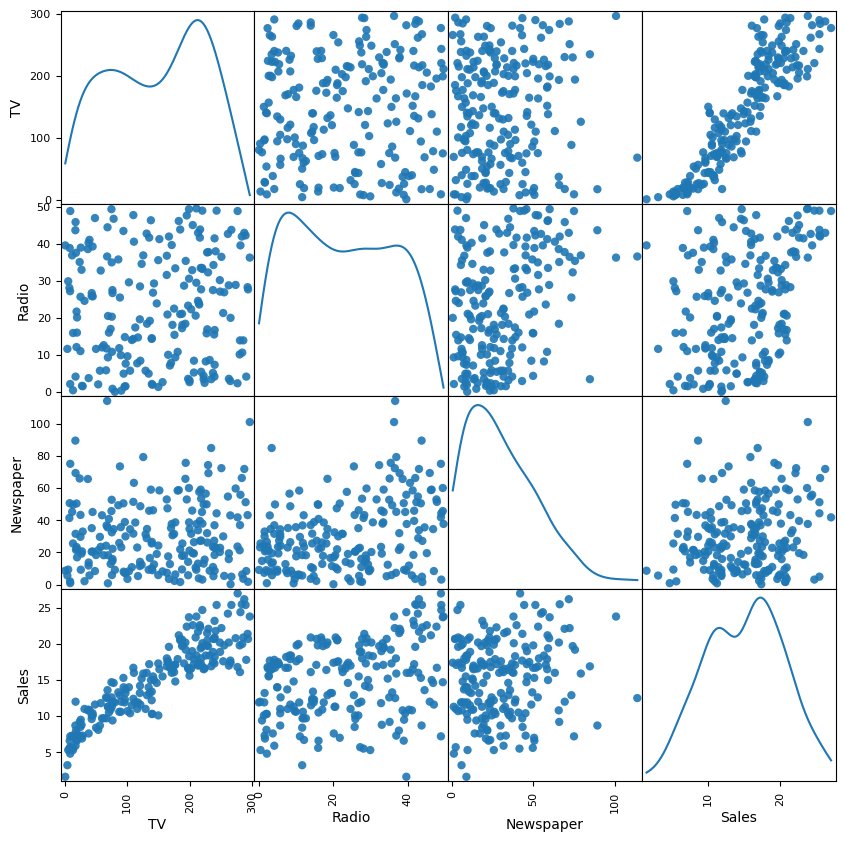

In [35]:
fig=plt.figure()
scatter_matrix(df,figsize=(10,10),alpha=0.9,diagonal="kde",marker="o")
plt.show()

# Preparation

In [39]:
df_sales=df["Sales"]
df_ad=df.drop(["Sales"],axis=1)

In [40]:
df_ad

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


# DATA PREPROCESSING AND MODEL TRAINING

In [42]:
x_train,x_test,y_train,y_test=train_test_split(df_ad,df_sales,test_size=0.2,random_state=42)
print("x train:",x_train.head(),"\nx test: ",x_test.head(),"\ny train: ",y_train.head(),"\ny test: ",y_test.head())

x train:         TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6 
x test:          TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2 
y train:  79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64 
y test:  95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


In [43]:
 independent_scaler=StandardScaler()
x_train=independent_scaler.fit_transform(x_train)
x_test=independent_scaler.transform(x_test)
print(x_train[0:5,:]) 
 print("test data\n",x_test[0:5,:])

[[-0.40424839 -1.02823707 -0.33767538]
 [ 0.32060772 -0.91982774 -1.16143931]
 [-1.27051084  0.2591237   0.25425079]
 [-1.04235941 -0.6962335  -0.57444585]
 [ 0.8791034  -1.38734296 -0.70762924]]
test data
 [[ 0.15781217  0.59112727  1.13227461]
 [ 0.53925283  1.68199613  1.13227461]
 [ 1.69783431  0.36753303  0.65380096]
 [-1.64363349  0.95023317  0.75245532]
 [ 0.83513672  1.77007871 -1.31928629]]


In [44]:
ln=LinearRegression()#create object of linear regression
ln.fit(x_train,y_train)
print("intercept is",str(ln.intercept_))
print("coefficient is",str(ln.coef_))
y=np.array([230.1,37.8,69.2])
prediction=ln.predict(x_test)
prediction

intercept is 15.330625000000003
coefficient is [4.58720774 1.48984025 0.08791597]


array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

final score: 0.9059011844150826


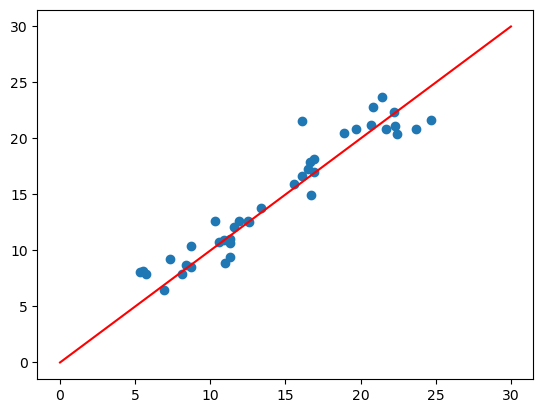

In [45]:
plt.scatter(y_test,prediction)

plt.plot([0, 30], [0, 30], color='red', linestyle='-', label='Single Line')
print("final score:",ln.score(x_test,y_test))

# MODEL EVALUATION 

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print("R2 score:", r2)

R2 score: 0.9059011844150826
